In [19]:
import os
import openai
import pandas as pd

# Load your API key from an environment variable or secret management service

data = pd.read_csv("data/event_data.csv")
input_data = data[:4]
input_data = input_data['body']
input_data
# messages=[{"role":"system", "content": "你是一个专业的经验软件工程分析师，请你通过以下数据分析这些第三方过时库(repo_name)的特征和原因是哪些,请用专业学术语言回答？"},{"role": "user", "content": ""}]
# chat_completion = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages = messages)
# chat_completion.choices[0]
# completion = openai.ChatCompletion.create(
#     model="gpt-3.5-turbo",
#     messages=[
#         {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
#         {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
#     ]
# )
# completion.choices[0].text


0    I'm running the following code:\r\n\r\n```\r\n...
1    Hey @stockholmux, the issue is that you are us...
2    No issue.\n\n* Fix indentation (it was surpris...
3    No issue.\n\nThis would work in pre-HTMLBars l...
Name: body, dtype: object

In [33]:
import pandas as pd
import requests
import warnings
import urllib3
import os

# Suppress all warnings from urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# Ensure the directory exists before saving files
if not os.path.exists('data/output'):
    os.makedirs('data/output')

# Mapping of 'type' to its corresponding .json file names
TYPE_TO_JSON = {
    "OpenRank": ["openrank.json"],
    "Activity": ["activity.json"],
    "Attention": ["attention.json"],
    "Active dates and times": ["active_dates_and_times.json"],
    "Stars": ["stars.json"],
    "Technical fork": ["technical_fork.json"],
    "Participants": ["participants.json"],
    "New contributors": ["new_contributors.json", "new_contributors_detail.json"],
    "Inactive contributors": ["inactive_contributors.json"],
    "Bus factor": ["bus_factor.json", "bus_factor_detail.json"],
    "Issues new": ["issues_new.json"],
    "Issues closed": ["issues_closed.json"],
    "Issue comments": ["issue_comments.json"],
    "Issue response time": ["issue_response_time.json"],
    "Issue resolution duration": ["issue_resolution_duration.json"],
    "Issue age": ["issue_age.json"],
    "Code change lines": ["code_change_lines_add.json", "code_change_lines_remove.json", "code_change_lines_sum.json"],
    "Change requests (Open PR)": ["change_requests.json"],
    "Change requests accepted (Merged PR)": ["change_requests_accepted.json"],
    "Change requests reviews": ["change_requests_reviews.json"],
    "Change request response time": ["change_request_response_time.json"],
    "Change request resolution duration": ["change_request_resolution_duration.json"],
    "Change request age": ["change_request_age.json"]
}

BASE_URL = 'https://oss.x-lab.info/open_digger/github/'

def construct_urls(repo_name):
    urls = {}
    for type_name, json_names in TYPE_TO_JSON.items():
        for json_name in json_names:
            url = f"{BASE_URL}{repo_name}/{json_name}"
            # This will now correctly create multiple URLs for types with multiple JSON files
            urls[url] = type_name

    return urls

def fetch_data_from_url(url):
    """Fetch data from the given URL."""
    try:
        response = requests.get(url, verify=False)
        response.raise_for_status()
        return response.json()
    except requests.HTTPError as e:
        print(f"Error fetching data from {url}: {e}")
        return None

def main():
    # Read the CSV file
    df = pd.read_csv('data/repo_name.csv')  # Replace with your file path
    data_by_type = {key: [] for key in TYPE_TO_JSON.keys()}

    # For each repo_name, construct URLs and fetch data
    for repo_name in df['repo_name']:
        urls = construct_urls(repo_name)
        for url, type_name in urls.items():
            print(f"Fetching data from {url}...")
            data = fetch_data_from_url(url)
            if data is not None:
                # This will append the repo_name to the data
                data['repo_name'] = repo_name
                data_by_type[type_name].append(data)

    # Save the data by type to different CSV files
    for type_name, data_list in data_by_type.items():
        if data_list:
            output_file = f'data/output/{type_name}.csv'
            pd.DataFrame(data_list).to_csv(output_file, index=False)
            print(f"Data for {type_name} has been saved to {output_file}")

if __name__ == '__main__':
    main()


Fetching data from https://oss.x-lab.info/open_digger/github/Turfjs/turf/openrank.json...
Fetching data from https://oss.x-lab.info/open_digger/github/Turfjs/turf/activity.json...
Fetching data from https://oss.x-lab.info/open_digger/github/Turfjs/turf/attention.json...
Fetching data from https://oss.x-lab.info/open_digger/github/Turfjs/turf/active_dates_and_times.json...
Fetching data from https://oss.x-lab.info/open_digger/github/Turfjs/turf/stars.json...
Fetching data from https://oss.x-lab.info/open_digger/github/Turfjs/turf/technical_fork.json...
Fetching data from https://oss.x-lab.info/open_digger/github/Turfjs/turf/participants.json...
Fetching data from https://oss.x-lab.info/open_digger/github/Turfjs/turf/new_contributors.json...
Fetching data from https://oss.x-lab.info/open_digger/github/Turfjs/turf/new_contributors_detail.json...
Fetching data from https://oss.x-lab.info/open_digger/github/Turfjs/turf/inactive_contributors.json...
Fetching data from https://oss.x-lab.info/

In [64]:

# List of files for both formats
first_format_files = [
    "Activity.csv", "Attention.csv", "Change requests (Open PR).csv",
    "Change requests accepted (Merged PR).csv", "Change requests reviews.csv",
    "Code change lines.csv", "Inactive contributors.csv", "Issue comments.csv",
    "Issues closed.csv", "Issues new.csv", "New contributors.csv",
    "OpenRank.csv", "Participants.csv", "Stars.csv", "Technical fork.csv"
]

second_format_files = [
    "Change request age.csv", "Change request resolution duration.csv",
    "Change request response time.csv", "Issue age.csv",
    "Issue resolution duration.csv", "Issue response time.csv"
]



TypeError: can only concatenate str (not "int") to str

In [56]:
import pandas as pd
import os

def handle_duplicate_columns(df):

    duplicate_columns = df.columns[df.columns.duplicated()].tolist()


    for column in duplicate_columns:
        duplicated_cols = df.filter(like=column).columns
        df[column] = df[duplicated_cols].sum(axis=1)
        df.drop(columns=duplicated_cols[:-1], inplace=True)  # 保留最后一个重复的列，因为我们已经合并了它的值

    return df

def process_first_group(file_name):
    df = pd.read_csv(file_name)


    df = handle_duplicate_columns(df)

    type_name = os.path.splitext(file_name)[0]  # 使用文件名作为type_name

    transformed = df.melt(id_vars=['repo_name'], value_vars=[str(year) for year in range(2015, 2023)],
                          value_name='value', var_name='year')

    transformed = transformed.sort_values(by=['repo_name', 'year'])
    transformed['type_name'] = type_name
    transformed = transformed.pivot(index='repo_name', columns='year', values='value').reset_index()
    transformed['type_name'] = type_name

    return transformed

def process_second_group(file_name):
    df = pd.read_csv(file_name)


    df = handle_duplicate_columns(df)

    type_name = os.path.splitext(file_name)[0]
    transformed = df[['repo_name'] + [f'avg_{year}' for year in range(2015, 2023)]]
    transformed.columns = ['repo_name'] + [str(year) for year in range(2015, 2023)]
    transformed['type_name'] = type_name

    return transformed

first_group_files = [
    "Activity.csv",
    # "Attention.csv", "Change requests (Open PR).csv",
    # "Change requests accepted (Merged PR).csv", "Change requests reviews.csv",
    # "Code change lines.csv", "Inactive contributors.csv", "Issue comments.csv",
    # "Issues closed.csv", "Issues new.csv", "New contributors.csv",
    # "OpenRank.csv", "Participants.csv", "Stars.csv", "Technical fork.csv"
]
second_group_files = [
    "Change request age.csv", "Change request resolution duration.csv",
    "Change request response time.csv", "Issue age.csv",
    "Issue resolution duration.csv", "Issue response time.csv"
]
base_dir = 'data/output1/'

for file_name in first_group_files:
    transformed_df = process_first_group(base_dir + file_name)
    transformed_df.to_csv(f'transformed_{file_name}', index=False)

for file_name in second_group_files:
    transformed_df = process_second_group(base_dir + file_name)
    transformed_df.to_csv(f'transformed_{file_name}', index=False)


ValueError: Index contains duplicate entries, cannot reshape

In [66]:
import pandas as pd
import os

def process_first_group(file_name):
    df = pd.read_csv(file_name)
    type_name = os.path.splitext(os.path.basename(file_name))[0]  # 使用文件名作为type_name，并且仅取基本文件名，不含路径


    melted = df.melt(id_vars=['repo_name'], value_vars=[str(year) for year in range(2015, 2023)],
                     value_name='value', var_name='year')


    melted_sorted = melted.sort_values(by=['repo_name', 'year'])


    melted_sorted['type_name'] = type_name


    transformed = melted_sorted.pivot(index='repo_name', columns='year', values='value').reset_index()
    transformed['type_name'] = type_name


    transformed = transformed[['repo_name', 'type_name'] + [str(year) for year in range(2015, 2023)]]

    return transformed


base_dir = './data/output/'
test_file = 'Activity.csv'
transformed_df = process_first_group(base_dir + test_file)
print(transformed_df.head())


year                           repo_name type_name    2015     2016      2017  \
0                 Azure/azure-sdk-for-js  Activity     NaN      NaN       NaN   
1                        ElemeFE/element  Activity     NaN  2265.37  10947.74   
2                     LLK/scratch-render  Activity     NaN      NaN       NaN   
3                          Leko/hothouse  Activity     NaN      NaN       NaN   
4     QuickBlox/quickblox-javascript-sdk  Activity  130.86   219.52    259.82   

year     2018     2019     2020     2021     2022  
0      228.07  4645.53  7027.16  7211.10  5932.29  
1     8086.62  9160.53  4894.66  2262.97  2024.52  
2         NaN      NaN      NaN      NaN      NaN  
3       78.53    81.62    54.20      NaN      NaN  
4      146.78    50.55    45.12    35.06    47.68  


In [77]:
import pandas as pd

df = pd.read_csv('data/merged_with_type.csv')

df['Year'] = pd.to_datetime(df['Date']).dt.year

data_counts_by_year = df.groupby('Year').size()

repo_counts_by_year = df.groupby('Year')['repo_name'].nunique()

type_counts_by_year = df.groupby(['Year', 'type']).size().unstack().fillna(0)

print("数据量统计（按年）:")
print(data_counts_by_year)

print("\nrepo_name统计（按年）:")
print(repo_counts_by_year)

print("\ntype数据量统计（按年）:")
print(type_counts_by_year.head(100))


数据量统计（按年）:
Year
2015    4192
2016    5432
2017    6200
2018    6821
2019    7204
2020    7366
2021    6707
2022    1499
dtype: int64

repo_name统计（按年）:
Year
2015    488
2016    609
2017    674
2018    691
2019    769
2020    783
2021    766
2022    506
Name: repo_name, dtype: int64

type数据量统计（按年）:
           Date            repo_name  new_contributors  \
0    2020-01-01  vue-dropdown-filter               1.0   
1    2020-09-01  vue-dropdown-filter               1.0   
2    2020-07-01  vue-dropdown-filter               1.0   
3    2017-01-01    aurelia-slickgrid               1.0   
4    2018-01-01    aurelia-slickgrid               1.0   
..          ...                  ...               ...   
600  2015-10-01         react-toggle               1.0   
601  2016-04-01         react-toggle               1.0   
602  2016-07-01         react-toggle               1.0   
603  2016-08-01         react-toggle               2.0   
604  2016-09-01         react-toggle               1.0   

     

In [78]:
import pandas as pd

df = pd.read_csv('data/merged_with_type.csv')

type_counts = df.groupby('type')['repo_name'].nunique()

print(type_counts)


type
normal            683
out_denpendecy    135
outdated          730
Name: repo_name, dtype: int64


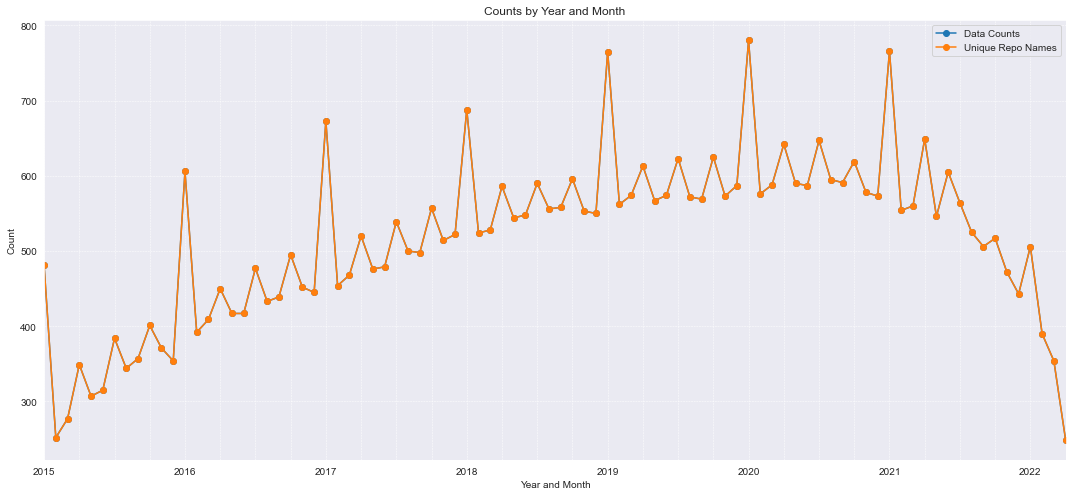

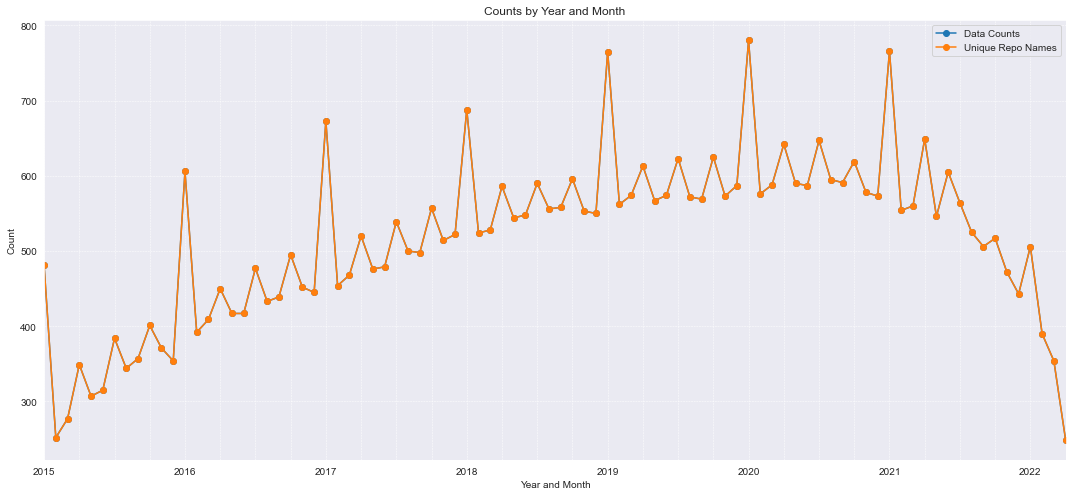